In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Of more than 30,000,000 rows.  
num_rows = 1000000

# Load the dataset
train_data = pd.read_csv("/Users/kei/.kaggle/competitions/expedia-hotel-recommendations/train.csv", nrows=num_rows)
test_data = pd.read_csv("/Users/kei/.kaggle/competitions/expedia-hotel-recommendations/test.csv", nrows=num_rows)
ss_data = pd.read_csv("/Users/kei/.kaggle/competitions/expedia-hotel-recommendations/sample_submission.csv", nrows=num_rows)
dest_data = pd.read_csv("/Users/kei/.kaggle/competitions/expedia-hotel-recommendations/destinations.csv", nrows=num_rows)

print('Total number of records: ', len(train_data))
display(train_data.head(30))
display(test_data.head(10))
# display(ss_data.head(10))
# display(dest_data.head(10))

Total number of records:  1000000


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21
5,2014-08-09 18:13:12,2,3,66,442,35390,911.5142,93,0,0,...,0,1,14984,1,0,1,2,50,1457,92
6,2014-07-16 09:42:23,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,2,2,50,675,41
7,2014-07-16 09:45:48,2,3,66,189,10067,NaN,501,0,1,...,0,1,8267,1,0,1,2,50,675,41
8,2014-07-16 09:52:11,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,1,2,50,675,69
9,2014-07-16 09:55:24,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,1,2,50,675,70


,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538
5,5,2015-07-21 11:58:45,2,3,66,311,48189,359.8521,51,0,...,2015-07-22,2015-07-24,4,0,2,11827,1,2,50,447
6,6,2015-07-29 07:58:39,2,3,66,311,48189,237.3465,51,0,...,2015-08-02,2015-08-03,2,0,1,8271,1,2,50,696
7,7,2015-08-01 20:13:15,2,3,66,348,24811,216.5785,51,0,...,2015-08-03,2015-08-04,2,0,1,8291,1,2,50,191
8,8,2015-11-07 12:29:09,2,3,66,311,48189,2337.6754,51,0,...,2015-12-30,2015-12-31,2,0,1,8250,1,2,50,628
9,9,2015-11-08 16:21:37,2,3,66,311,48189,2539.7995,51,0,...,2016-01-02,2016-01-03,2,0,1,9145,1,2,50,364


In [2]:
# train_data = train_data[:1000]
# train_data = train_data[:10000]  # This had caused an error. The date data might include strings and Timestamps. 

# Extract the rows whose 'is_booking' is '1'. 
train_data = train_data[train_data.is_booking == 1]
len(train_data)

82096

In [3]:
# Delete rows that include NaN.
train_data_nandropped = train_data.dropna()
train_data = pd.DataFrame(data = train_data_nandropped)
len(train_data)

54004

In [4]:
# res = train_data.groupby('user_id')['hotel_cluster'].value_counts()
# display(res.head(20))

In [5]:
grouped = train_data.groupby('hotel_cluster')
grouped.size().head(10)

hotel_cluster
0    362
1    816
2    729
3    178
4    715
5    652
6    832
7    683
8    310
9    827
dtype: int64

In [6]:
# See top 10. 
train_data['hotel_cluster'].value_counts().head(10)

91    2806
48    1930
42    1635
28    1307
18    1218
95    1186
59    1121
50    1113
16    1085
21     990
Name: hotel_cluster, dtype: int64

In [7]:
# Target data. 
hotel_cluster_raw = train_data['hotel_cluster']

In [8]:
# Create training data. 
# Create a new column, 'length_stay', which is equal to 'srch_co' - 'srch_ci'.
from datetime import datetime
# train_data['srch_ci'].head(5)  # 0    2014-08-27, ... 
train_data['srch_ci'] = train_data['srch_ci'].dropna()\
    .apply(lambda x: x if isinstance(x, datetime) else datetime.strptime(x[:10], "%Y-%m-%d"))
train_data['srch_co'] = train_data['srch_co'].dropna()\
    .apply(lambda x: x if isinstance(x, datetime) else datetime.strptime(x[:10], "%Y-%m-%d"))
train_data['length_stay'] = (train_data['srch_co'] - train_data['srch_ci']).dropna().apply(lambda x: x.days)
train_data['length_stay'].head(20)

1      4
79     5
81     5
83     3
128    1
133    1
372    2
401    2
408    2
410    2
414    1
753    1
754    6
755    5
756    4
759    5
763    3
764    3
768    1
774    2
Name: length_stay, dtype: int64

In [9]:
# Drop columns. 
drop_columns = ['date_time', 'user_id', 'hotel_cluster', 'srch_ci', 'srch_co']
features_raw = train_data.drop(drop_columns, axis=1)

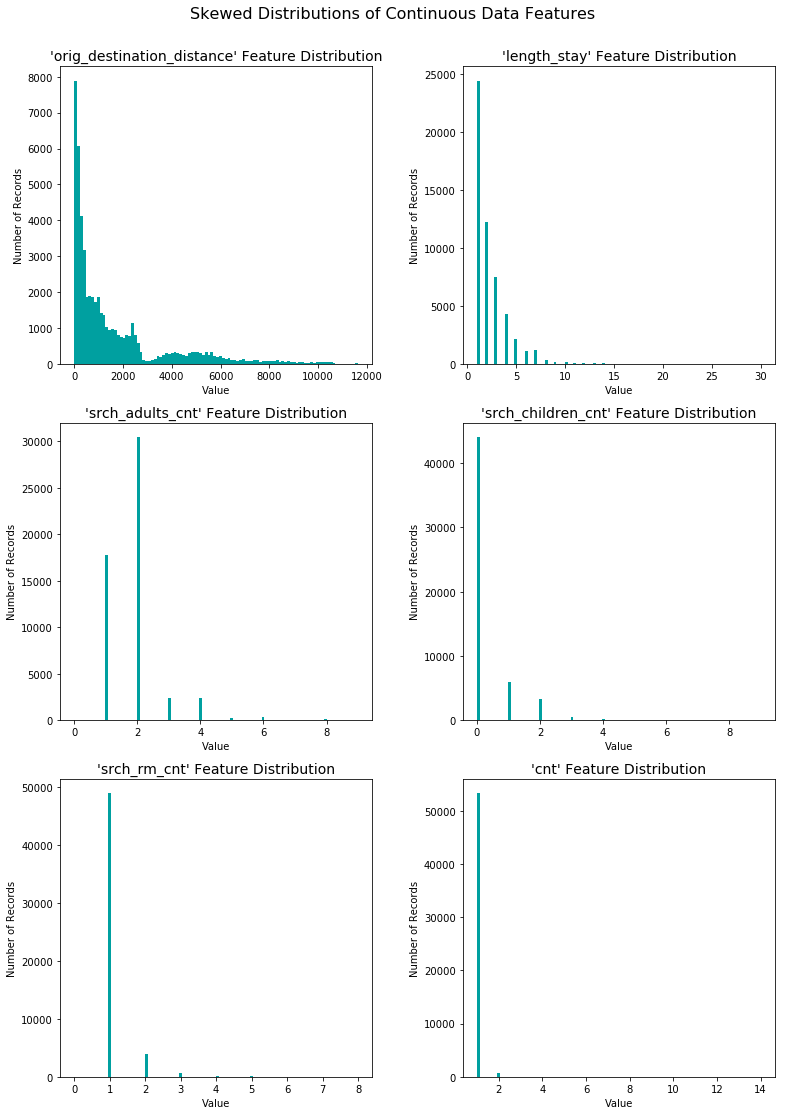

In [10]:
# Display the distribution of 'orig_destination_distance'. 
numerical_data = ['orig_destination_distance', 'length_stay', 'srch_adults_cnt', 'srch_children_cnt', \
                   'srch_rm_cnt', 'cnt']
vs.distribution(train_data, numerical_data)

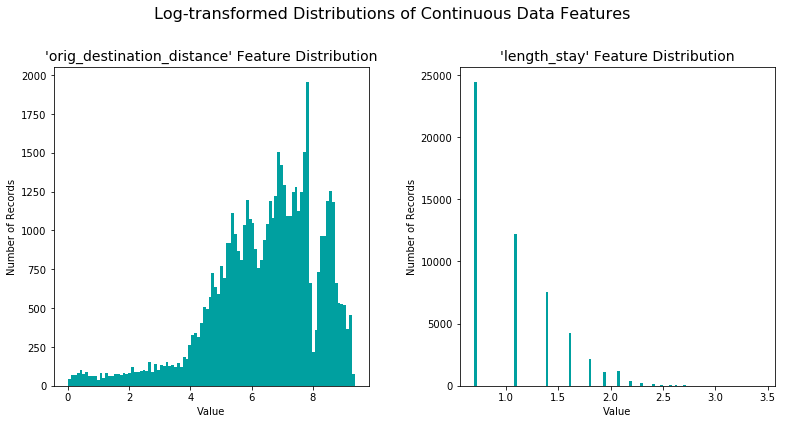

In [11]:
# Log-transform the skewed features
skewed = ['orig_destination_distance', 'length_stay']
features_log_transformed = pd.DataFrame(data=features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, skewed, transformed=True)

In [12]:
# Normalization. 
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical_data] = scaler.fit_transform(features_log_transformed[numerical_data])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(10))

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,length_stay
1,2,3,66,348,48862,0.823628,0,1,9,0.222222,0.000000,0.125,8250,1,1,0.0,2,50,628,0.334310
79,2,3,66,462,41898,0.833687,0,1,1,0.333333,0.000000,0.250,12009,1,1,0.0,2,50,680,0.400831
81,2,3,66,462,41898,0.833687,0,1,1,0.222222,0.000000,0.125,12009,1,1,0.0,2,50,680,0.400831
83,2,3,66,462,41898,0.833687,0,1,1,0.222222,0.000000,0.125,12009,1,1,0.0,2,50,680,0.252896
128,2,3,66,174,40365,0.965849,0,0,0,0.222222,0.000000,0.250,1571,3,1,0.0,3,5,89,0.000000
133,2,3,66,174,21855,0.965041,0,0,1,0.111111,0.000000,0.125,12861,5,1,0.0,3,5,89,0.000000
372,2,3,66,174,16634,0.156229,0,0,1,0.222222,0.222222,0.125,61531,6,1,0.0,2,50,1241,0.147935
401,2,3,66,174,46432,0.505564,0,0,1,0.222222,0.000000,0.125,11835,1,1,0.0,2,50,633,0.147935
408,2,3,66,189,2871,0.839247,1,0,9,0.333333,0.000000,0.125,4777,3,1,0.0,2,50,967,0.147935
410,2,3,66,189,2871,0.839247,1,0,9,0.333333,0.000000,0.125,4777,3,1,0.0,2,50,967,0.147935


In [13]:
# One-hot encoding...

# print("site_name: ")
# features_log_minmax_transform['site_name'].value_counts()

# print("posa_continent: ")
# features_log_minmax_transform['posa_continent'].value_counts()

# print("user_location_country: ")
# features_log_minmax_transform['user_location_country'].value_counts()

# print("user_location_region: ")
# features_log_minmax_transform['user_location_region'].value_counts()

# print("user_location_city: ")
# features_log_minmax_transform['user_location_city'].value_counts()
# len(features_log_minmax_transform['user_location_city'].value_counts())

# print("channel: ")
# features_log_minmax_transform['channel'].value_counts()

# print("srch_destination_id: ")
# features_log_minmax_transform['srch_destination_id'].value_counts()

print("srch_destination_type_id: ")
features_log_minmax_transform['srch_destination_type_id'].value_counts()

# print("hotel_continent: ")
# features_log_minmax_transform['hotel_continent'].value_counts()

# print("hotel_country: ")
# features_log_minmax_transform['hotel_country'].value_counts()

# print("hotel_market: ")
# features_log_minmax_transform['hotel_market'].value_counts()

srch_destination_type_id: 


1    28499
6    14252
3     4767
5     4144
4     2124
8      217
7        1
Name: srch_destination_type_id, dtype: int64

In [14]:
categorical_columns = ['site_name', 'posa_continent', 'user_location_country', 'user_location_region', \
                       'user_location_city', 'channel', 'srch_destination_id', 'hotel_continent', \
                       'srch_destination_type_id', 'hotel_country', 'hotel_market']

In [15]:
# Convert type 'int' to 'string' in the categorical columns. 
features_log_minmax_transform[categorical_columns] = \
    features_log_minmax_transform[categorical_columns].astype('str')

# One-hot encoding. 
features_final = pd.get_dummies(features_log_minmax_transform)
# Print the number of features after one-hot encoding
columns = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(columns)))
print()
# See the encoded feature names.
print(columns)

12724 total features after one-hot encoding.

['orig_destination_distance', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'is_booking', 'cnt', 'length_stay', 'site_name_10', 'site_name_11', 'site_name_13', 'site_name_15', 'site_name_16', 'site_name_17', 'site_name_18', 'site_name_19', 'site_name_2', 'site_name_20', 'site_name_21', 'site_name_22', 'site_name_23', 'site_name_24', 'site_name_25', 'site_name_26', 'site_name_27', 'site_name_28', 'site_name_30', 'site_name_32', 'site_name_33', 'site_name_34', 'site_name_35', 'site_name_37', 'site_name_40', 'site_name_41', 'site_name_6', 'site_name_8', 'site_name_9', 'posa_continent_0', 'posa_continent_1', 'posa_continent_2', 'posa_continent_3', 'posa_continent_4', 'user_location_country_0', 'user_location_country_1', 'user_location_country_130', 'user_location_country_141', 'user_location_country_16', 'user_location_country_182', 'user_location_country_202', 'user_location_country_205', 'user_location_coun

In [16]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# print("feature_final: ", len(features_final))
# print("hotel_cluster_raw: ", len(hotel_cluster_raw))

X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    hotel_cluster_raw, 
                                                    test_size=0.2, 
                                                    random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

/Users/kei/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 43203 samples.
Testing set has 10801 samples.


In [17]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import confusion_matrix


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time.
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average=None)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average=None)
    
    # creating a confusion matrix
    cm_train = confusion_matrix(y_train[:300], predictions_train)
    cm_test = confusion_matrix(y_test, predictions_test)
    
    
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
#     print "Training time:  {:.3f}".format(results['train_time'])
#     print

    print(cm_test)
    
    # Return the results
    return results

In [18]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn import linear_model
from sklearn.svm import SVC

# Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=0)
# clf_C = SVC(random_state=0)
clf_C = linear_model.LogisticRegression(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(samples_100 / 10)
samples_1 = int(samples_100 / 100)

# print(samples_1)
# print(samples_10)
# print(samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# From Review 2
print()
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).round(4).rename(columns={0:'1%', 1:'10%', 2:'100%'}))
        
# Run metrics visualization for the three supervised learning models chosen
# vs.evaluate(results, accuracy, fscore)

/Users/kei/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GaussianNB trained on 432 samples.
[[ 2  0  0 ...,  0  0  0]
 [ 0 41  0 ...,  0  1  0]
 [ 0  0  6 ...,  1  7  0]
 ..., 
 [ 0  0  3 ...,  1  9  0]
 [ 0  0  8 ...,  1 22  0]
 [ 0  0  2 ...,  0  3  0]]


KeyboardInterrupt: 